<img src="Agrupamento.png">

# 1. Agrupamento de empresas similares

[Por Hernandes Matias Junior](http://linkedin.com/in/hernandesmjunior)

Neste estudo utilizaremos o algoritmo de machine learning KMeans para clusterizar uma base de dados de empresas e suas variáveis.

A ilustração de capa é de Daria Shulzhenko.

# 2. Importando bibliotecas e base de dados


In [33]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

sns.set()

In [4]:
# será importado o arquivo já trabalhado no estudo anterior

with open(r'C:\Users\herna\OneDrive\Ciência de Dados para Negócios\Finanças\Classificação de empresas para investimentos no longo prazo\bases_classificacao.pkl','rb') as f:
    dataset, dataset_original, X, y, empresa, scaler = pickle.load(f)

In [5]:
dataset # dataset tratado já com variáveis dummies

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,24.710000,0.380000,-0.53000,555.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,14.920000,3.390000,22.00000,703.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,31.550000,2.420000,-63.00000,13.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,21.690000,3.610000,46.00000,17.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,5.650000,0.320000,116.00000,45.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,15.640000,1.940000,26.00000,307.596923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
343,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,109.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
344,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,-7.350000,0.330000,-271.00000,21.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
345,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,10.669968,12.338617,1.677604,-7975.95134,-8.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [6]:
X #atributos previsores

array([[4.65507421e-03, 8.83755803e-03, 8.85280057e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 1.03563574e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 1.05171359e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 1.99753510e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 5.54408853e-07, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [7]:
y #classes dos registros

array(['ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'ruim', 'boa', 'ruim', 'boa', 'ruim', 'ruim',
       'boa', 'medio', 'medio', 'ruim', 'ruim', 'ruim', 'ruim', 'boa',
       'medio', 'medio', 'boa', 'boa', 'medio', 'boa', 'ruim', 'medio',
       'ruim', 'ruim', 'ruim', 'medio', 'ruim', 'boa', 'ruim', 'boa',
       'ruim', 'boa', 'boa', 'boa', 'ruim', 'boa', 'ruim', 'medio',
       'ruim', 'medio', 'medio', 'medio', 'ruim', 'medio', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'boa', 'ruim', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'boa', 'ruim', 'ruim',
       'ruim', 'ruim', 'medio', 'ruim', 'ruim', 'medio', 'boa', 'ruim',
       'medio', 'medio', 'boa', 'medio', 'boa', 'boa', 'boa', 'medio',
       'medio', 'boa', 'ruim', 'boa', 'medio', 'medio', 'ruim', 'ruim',
       'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'boa', 'ruim', 'ruim',
       'ruim', 'boa', 'ruim', 'ruim', 'ruim', 'ruim', 'medio', 'ruim',
       'ru

# 3. Obtenção do número de clusters

In [14]:
wcss = [] # within cluster sum of squares

faixa = range(1, 21)

for i in faixa:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [15]:
print(wcss)

[549.5537304637771, 447.0755844180395, 406.3726830716316, 384.28332372840396, 365.4394309134289, 345.1067296058585, 333.648079203411, 322.76247511278035, 313.1348656915789, 295.524093797385, 292.42782536898204, 283.00109515617794, 277.34115320542844, 273.81153680662993, 263.92545109321804, 261.5586816899391, 260.16286885633355, 254.81915877284519, 245.384169067311, 244.3761848201626]


Text(0, 0.5, 'WCSS')

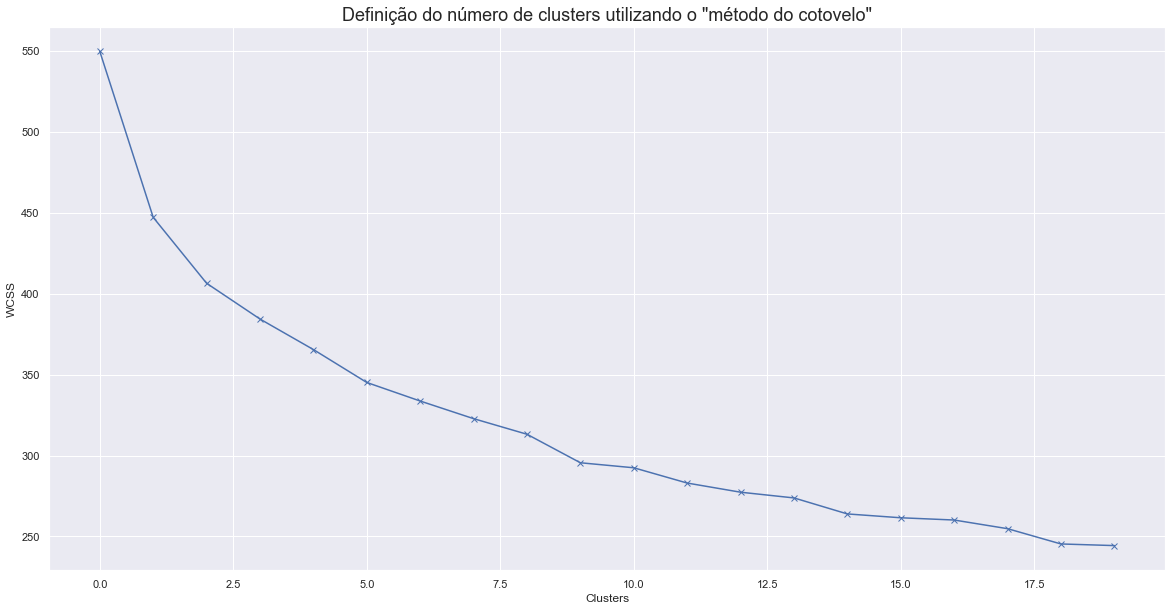

In [19]:

plt.figure(figsize=(20,10))
plt.title('Definição do número de clusters utilizando o "método do cotovelo"', fontsize=18)
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS')

Foi escolhido o número de 6 clusters.

# 4. Agrupamento com KMeans

In [20]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [21]:
labels = kmeans.labels_
labels

array([3, 5, 3, 3, 1, 0, 0, 0, 1, 3, 0, 5, 4, 1, 0, 0, 1, 0, 4, 2, 4, 4,
       2, 1, 0, 0, 1, 1, 1, 5, 1, 0, 0, 0, 0, 5, 0, 2, 5, 5, 5, 5, 4, 1,
       4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 1, 4, 4, 0, 0, 0, 5, 0, 0, 0, 4, 5,
       0, 0, 4, 3, 5, 3, 4, 3, 4, 4, 5, 3, 5, 0, 3, 3, 5, 3, 1, 1, 5, 3,
       3, 1, 4, 1, 2, 5, 4, 4, 4, 3, 4, 1, 0, 2, 1, 0, 4, 4, 1, 0, 0, 4,
       0, 4, 4, 4, 0, 0, 1, 0, 3, 3, 4, 0, 1, 5, 4, 0, 4, 2, 1, 4, 0, 1,
       4, 0, 1, 4, 0, 5, 0, 3, 5, 5, 4, 4, 5, 3, 0, 3, 3, 0, 4, 2, 2, 2,
       4, 4, 4, 1, 1, 3, 1, 5, 0, 4, 4, 4, 4, 0, 2, 0, 1, 4, 0, 0, 0, 0,
       4, 1, 1, 0, 0, 0, 4, 0, 4, 2, 4, 0, 1, 4, 4, 4, 0, 1, 0, 0, 1, 1,
       4, 0, 0, 0, 4, 4, 2, 0, 4, 0, 0, 2, 3, 1, 0, 5, 0, 1, 0, 4, 0, 1,
       2, 0, 0, 5, 0, 4, 0, 5, 0, 0, 0, 0, 4, 4, 4, 0, 4, 0, 0, 4, 0, 4,
       0, 5, 0, 4, 1, 2, 4, 5, 5, 0, 4, 4, 5, 4, 0, 0, 0, 5, 1, 4, 4, 0,
       2, 4, 0, 1, 5, 0, 4, 4, 4, 1, 1, 2, 0, 4, 3, 0, 3, 0, 0, 0, 4, 4,
       0, 0, 4, 4, 0, 0, 2, 0, 0, 0, 1, 4, 0, 2, 0,

In [22]:
np.unique(labels, return_counts=True) # verificando o número de empresas em cada um dos clusters

(array([0, 1, 2, 3, 4, 5]), array([123,  48,  20,  25,  95,  36], dtype=int64))

In [23]:
centroides = pd.DataFrame(data=kmeans.cluster_centers_, columns=[dataset.columns])

In [24]:
centroides # visualizando a média dos atributos dos clusters

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,0.026383,0.027836,0.010005,0.825197,0.210394,0.504764,0.255849,0.411573,0.880250,0.129643,...,8.130081e-03,1.626016e-02,8.130081e-03,2.168404e-18,2.168404e-18,1.000000e+00,1.387779e-17,-1.387779e-16,2.775558e-17,4.336809e-18
1,0.092151,0.035921,0.012434,0.835668,0.204321,0.509163,0.257351,0.441675,0.888709,0.192410,...,2.602085e-18,2.602085e-18,2.602085e-18,1.301043e-18,2.083333e-02,1.110223e-16,-6.938894e-18,1.000000e+00,-1.387779e-17,2.602085e-18
2,0.027618,0.016554,0.006036,0.834653,0.204301,0.513683,0.263754,0.465557,0.888921,0.136044,...,5.000000e-02,-8.673617e-19,-8.673617e-19,-4.336809e-19,-4.336809e-19,-1.110223e-16,9.000000e-01,0.000000e+00,-2.775558e-17,1.000000e-01
3,0.016671,0.018382,0.005652,0.834145,0.204464,0.510562,0.250310,0.417361,0.885140,0.127368,...,-1.734723e-18,-1.734723e-18,-1.734723e-18,-8.673617e-19,-8.673617e-19,1.000000e+00,-1.387779e-17,-5.551115e-17,-2.775558e-17,-1.734723e-18
4,0.005296,0.004662,0.001853,0.808819,0.200584,0.497680,0.249006,0.413250,0.877129,0.124892,...,3.469447e-18,3.469447e-18,3.469447e-18,1.734723e-18,1.734723e-18,1.000000e+00,-1.387779e-17,-2.775558e-17,-2.775558e-17,3.469447e-18
5,0.042093,0.024764,0.056021,0.835878,0.204870,0.540062,0.282545,0.457471,0.890205,0.147694,...,1.734723e-18,1.734723e-18,2.777778e-02,2.777778e-02,8.673617e-19,0.000000e+00,-6.938894e-18,-5.551115e-17,1.000000e+00,1.734723e-18


### Utilizando o processo inverso da normalização para trazer os valores reais

In [25]:
centroides = scaler.inverse_transform(centroides)
centroides = pd.DataFrame(data=centroides, columns=[dataset.columns])
centroides

,Valor de M.,EV,Pes. Fisicas,LPA desconctado,VPA,P/L,P/L descontado,P/VPA,Margem Segurança,Luc. Liquido,...,80,81,82,83,84,85,86,87,88,89
0,7.563673e+09,1.388919e+10,18047.799519,-8.330954,129.784424,5.501455,11.406052,1.011081,-10943.181573,87.061513,...,8.130081e-03,1.626016e-02,8.130081e-03,2.168404e-18,2.168404e-18,1.000000e+00,1.387779e-17,-1.387779e-16,2.775558e-17,4.336809e-18
1,2.641881e+10,1.793046e+10,22427.625000,1.798271,16.208333,13.102499,13.305388,2.225992,-672.510528,1336.682500,...,2.602085e-18,2.602085e-18,2.602085e-18,1.301043e-18,2.083333e-02,1.110223e-16,-6.938894e-18,1.000000e+00,-1.387779e-17,2.602085e-18
2,7.917717e+09,8.249300e+09,10888.750000,0.816350,15.843600,20.913998,21.404431,3.189880,-414.947567,214.508923,...,5.000000e-02,-8.673617e-19,-8.673617e-19,-4.336809e-19,-4.336809e-19,-1.110223e-16,9.000000e-01,0.000000e+00,-2.775558e-17,1.000000e-01
3,4.779383e+09,9.162879e+09,10195.170726,0.325480,18.892880,15.520399,4.399545,1.244704,-5006.335254,41.767754,...,-1.734723e-18,-1.734723e-18,-1.734723e-18,-8.673617e-19,-8.673617e-19,1.000000e+00,-1.387779e-17,-5.551115e-17,-2.775558e-17,-1.734723e-18
4,1.518426e+09,2.304394e+09,3343.787415,-24.175864,-53.671221,-6.738951,2.749931,1.078780,-14731.793257,-7.520032,...,3.469447e-18,3.469447e-18,3.469447e-18,1.734723e-18,1.734723e-18,1.000000e+00,-1.387779e-17,-2.775558e-17,-2.775558e-17,3.469447e-18
5,1.206761e+10,1.235313e+10,101047.813004,2.001944,26.477222,66.495556,45.172462,2.863545,1143.168018,446.448547,...,1.734723e-18,1.734723e-18,2.777778e-02,2.777778e-02,8.673617e-19,0.000000e+00,-6.938894e-18,-5.551115e-17,1.000000e+00,1.734723e-18


In [27]:
# trazendo o nome das empresas

dataset_cluster = pd.concat([dataset_original,pd.DataFrame({'cluster':labels})], axis=1)
dataset_cluster

,Situação,Empresa,Segmento,Valor de M.,EV,Pes. Fisicas,Categoria,LPA desconctado,VPA,P/L,...,Patri. Liquido.1,Divida Liquida,Divida Bruta/PL,EF,ECP,EM,Pas. Circulante,Liq. Imediata,Capital de giro,cluster
0,ruim,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,alerta,0.560000,36.030000,24.710000,...,2012.000000,1567.000000,0.860000,49.000000,11.000000,3.940000,4508.000000,0.120000,102.000000,3.0
1,boa,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,dividendos,0.180000,0.800000,14.920000,...,1812.000000,2459.000000,1.720000,58.000000,15.000000,2.400000,828.000000,0.700000,-52.000000,5.0
2,ruim,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,alerta,0.150000,2.070000,31.550000,...,48.000000,-8.000000,1.720811,30.548746,38.872065,1.240000,8.000000,1.130000,4.000000,3.0
3,ruim,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,alerta,0.200000,1.230000,21.690000,...,78.000000,-31.000000,0.040000,5.250000,23.000000,1.150000,7.000000,6.000000,67.000000,3.0
4,ruim,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,crescimento moderado,0.600000,10.420000,5.650000,...,721.000000,-440.750000,0.250000,30.548746,38.872065,1.010000,6.000000,0.500000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,ruim,whirlpool s.a whrl,eletrodomesticos,5.034333e+09,4.615333e+09,30941.268156,dividendos,0.210000,1.690000,15.640000,...,2130.000000,-421.000000,0.090000,10.000000,47.000000,2.630000,3598.000000,0.210000,677.000000,NaN
373,boa,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,alerta,-8.723009,37.412006,10.669968,...,1060.000000,478.000000,0.740000,42.000000,9.000000,2.130000,492.000000,1.040000,444.000000,NaN
374,ruim,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,alerta,-0.520000,11.610000,-7.350000,...,452.000000,-135.000000,1.720811,30.548746,38.872065,1.180000,59.000000,0.780000,120.000000,NaN
375,ruim,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,alerta,-8.723009,37.412006,10.669968,...,4.000000,-2.000000,1.720811,30.548746,38.872065,62.646871,1.000000,1.000000,3.000000,NaN


In [29]:
# verificando o número de empresas de cada categoria por cluster

categoria_cluster = dataset_cluster.groupby(['Categoria', 'cluster'])['cluster'].count()
categoria_cluster

Categoria                 cluster
alerta                    0.0        79
                          1.0        26
                          2.0        15
                          3.0        20
                          4.0        65
                          5.0        22
crescimento               0.0         7
                          1.0         3
                          4.0         4
                          5.0         3
crescimento moderado      0.0        17
                          1.0        12
                          2.0         1
                          3.0         1
                          4.0         9
                          5.0         3
dividendos                0.0         9
                          1.0         4
                          2.0         2
                          3.0         4
                          4.0         6
                          5.0         6
dividendos + crescimento  0.0         1
                          4.0         1
Name: 

In [30]:
situacao_cluster = dataset_cluster.groupby(['Situação', 'cluster'])['cluster'].count()
situacao_cluster

Situação  cluster
boa       0.0        26
          1.0        16
          2.0         4
          3.0         6
          4.0        16
          5.0        13
medio     0.0        29
          1.0        12
          2.0         6
          3.0         8
          4.0        21
          5.0         4
ruim      0.0        58
          1.0        17
          2.0         8
          3.0        11
          4.0        48
          5.0        17
Name: cluster, dtype: int64

In [32]:
pd.set_option('max_rows', None)
segmento_cluster = dataset_cluster.groupby(['Segmento', 'cluster'])['cluster'].count()
segmento_cluster

Segmento                                    cluster
acessorios                                  0.0         2
agricultura                                 0.0         2
                                            4.0         1
                                            5.0         1
agua e saneamento                           0.0         1
                                            3.0         1
                                            4.0         2
alimentos                                   0.0         3
                                            5.0         1
aluguel de carros                           0.0         2
armas e munições                            1.0         1
artefatos de cobre                          0.0         1
artefatos de ferro e aço                    0.0         2
                                            3.0         1
                                            4.0         1
                                            5.0         1
automoveis e motocic

# 5. Visualização do agrupamento

In [34]:
# reduzindo a dimensionalidade do dataset

pca = PCA(n_components=2)
componentes = pca.fit_transform(X)
componentes

array([[-2.75371422e-01,  5.45708241e-01],
       [ 8.19667857e-01,  1.17432516e+00],
       [-2.98875193e-01,  5.07039457e-01],
       [-2.81480235e-01,  5.27281643e-01],
       [ 1.03169003e+00, -6.60007139e-01],
       [-3.38568275e-01, -4.16567599e-02],
       [-3.56719192e-01, -4.07534059e-02],
       [-3.50335694e-01, -3.52772437e-02],
       [ 9.04650247e-01, -5.93812854e-01],
       [-2.77094853e-01,  5.41610842e-01],
       [-3.51329011e-01, -2.13270615e-02],
       [ 7.34019349e-01,  5.33231467e-01],
       [-3.93265749e-01, -9.82878477e-02],
       [ 9.74965061e-01, -5.77750140e-01],
       [-3.99552366e-01, -8.86833694e-02],
       [-3.31532656e-01,  2.69588699e-03],
       [ 9.81654300e-01,  4.93061319e-02],
       [-3.30136442e-01, -8.20708565e-04],
       [-4.19271180e-01, -1.43930390e-01],
       [ 6.96558632e-01, -6.54634058e-02],
       [-3.74519572e-01, -7.67006641e-02],
       [-4.00633449e-01, -9.19771574e-02],
       [ 5.66626220e-01,  4.34593995e-02],
       [ 1.

In [35]:
pca_df = pd.DataFrame(data=componentes, columns=['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-0.275371,0.545708
1,0.819668,1.174325
2,-0.298875,0.507039
3,-0.281480,0.527282
4,1.031690,-0.660007


In [36]:
# concatenando o cluster

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

,pca1,pca2,cluster
0,-0.275371,0.545708,3
1,0.819668,1.174325,5
2,-0.298875,0.507039,3
3,-0.281480,0.527282,3
4,1.031690,-0.660007,1


<AxesSubplot:title={'center':'Visualização do agrupamento com KMeans'}, xlabel='pca1', ylabel='pca2'>

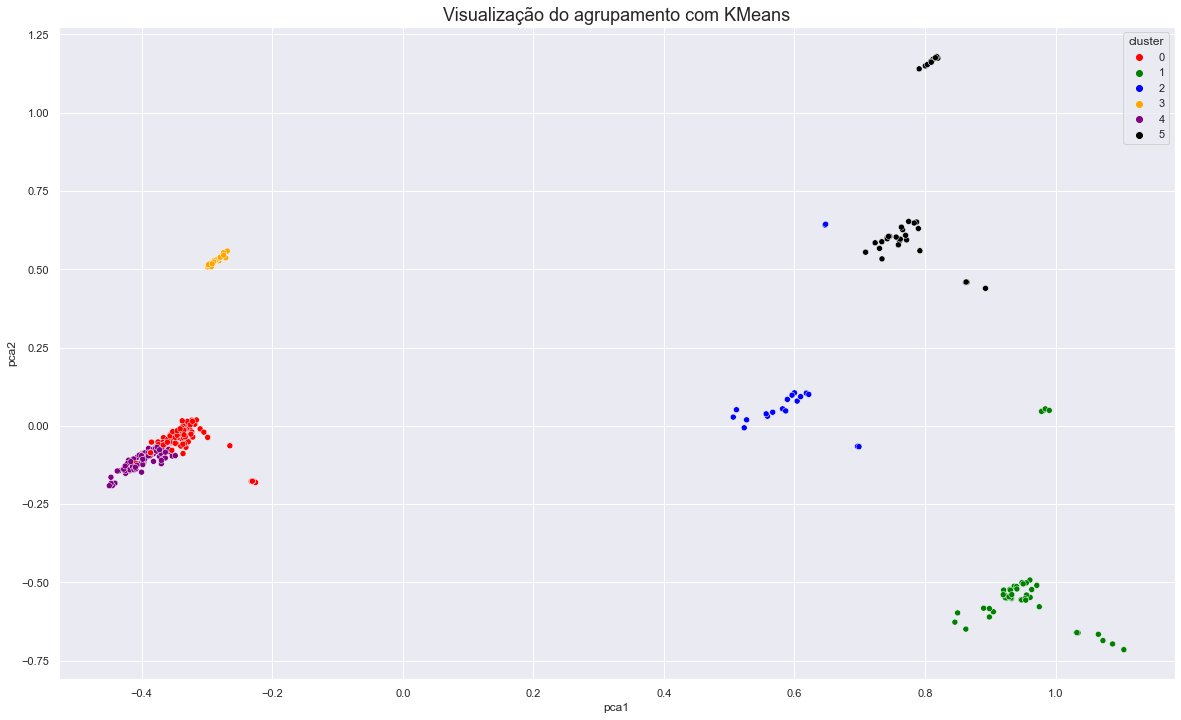

In [42]:
plt.figure(figsize=(20,12))
plt.title('Visualização do agrupamento com KMeans', fontsize=18)
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df, palette=['red','green','blue','orange','purple','black'])